In [1]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
## loading in the training data
## original df
train_ames = pd.read_csv("./datasets/train.csv")

In [3]:
## loading in testing data
## original df
testing_ames = pd.read_csv("./datasets/test.csv")

In [4]:
train_ames.shape

(2051, 81)

In [5]:
testing_ames.shape

(878, 80)

In [6]:
### What column is in train that is not in test?

set(train_ames) - set(testing_ames)

{'SalePrice'}

In [7]:
## data cleaning

In [8]:
## set Id column to be our new index for both training and test
train_ames.set_index("Id", inplace=True)
testing_ames.set_index("Id", inplace=True)

In [9]:
train_ames.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [10]:
train_ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [11]:
## how many null values in training set
train_ames.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 80, dtype: int64

In [12]:
## does not include condition 1 or condition 2

features_one_train = train_ames[["PID","MS SubClass", "MS Zoning","Lot Area", "Street", "Alley","Lot Shape","Lot Config", 
                      "Neighborhood","Bldg Type", "House Style","Overall Qual", "Overall Cond", "Year Built", 
                      "Year Remod/Add","SalePrice"]]

In [13]:
features_one_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PID             2051 non-null   int64 
 1   MS SubClass     2051 non-null   int64 
 2   MS Zoning       2051 non-null   object
 3   Lot Area        2051 non-null   int64 
 4   Street          2051 non-null   object
 5   Alley           140 non-null    object
 6   Lot Shape       2051 non-null   object
 7   Lot Config      2051 non-null   object
 8   Neighborhood    2051 non-null   object
 9   Bldg Type       2051 non-null   object
 10  House Style     2051 non-null   object
 11  Overall Qual    2051 non-null   int64 
 12  Overall Cond    2051 non-null   int64 
 13  Year Built      2051 non-null   int64 
 14  Year Remod/Add  2051 non-null   int64 
 15  SalePrice       2051 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 272.4+ KB


In [14]:
features_one_train.isnull().sum()

PID                  0
MS SubClass          0
MS Zoning            0
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Lot Config           0
Neighborhood         0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
SalePrice            0
dtype: int64

In [15]:
# gets only the numeric data from features one dataframe 
numeric_one_feats = features_one_train._get_numeric_data()

In [16]:
## looking at the correlation matrix of features one 
numeric_one_feats.corr()

,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,SalePrice
PID,1.000000,-0.003632,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.255052
MS SubClass,-0.003632,1.000000,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.087335
Lot Area,0.024135,-0.245484,1.000000,0.105824,-0.019185,0.036002,0.050771,0.296566
Overall Qual,-0.265863,0.035763,0.105824,1.000000,-0.082770,0.602964,0.584654,0.800207
Overall Cond,0.106861,-0.070141,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.097019
Year Built,-0.347039,0.035983,0.036002,0.602964,-0.370988,1.000000,0.629116,0.571849
Year Remod/Add,-0.176666,0.044836,0.050771,0.584654,0.042614,0.629116,1.000000,0.550370
SalePrice,-0.255052,-0.087335,0.296566,0.800207,-0.097019,0.571849,0.550370,1.000000


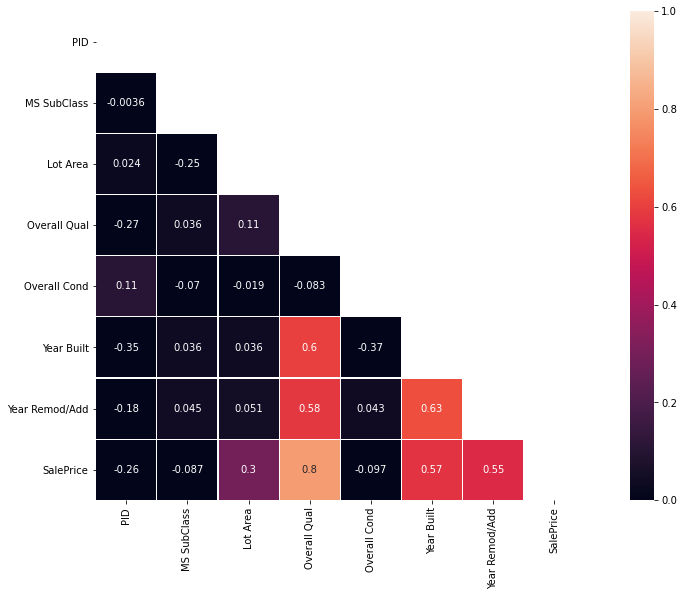

In [181]:
# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = numeric_one_feats.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, annot = True, linewidth=0.05, vmin=0, vmax=1);

**conclusions** after looking at correlation betweeen price and feature above, I've decided to drop Overall condition, MS Subclass, street_pave (street,corr = 0.069), dropping all building, lot config vars, lot shape. 

## Dropping Columns based on corr matrix value

In [17]:
features_one_train.drop(columns = ["Lot Config", "MS SubClass"],inplace=True)

/Users/brianna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
features_one_train.drop(columns = ['MS Zoning'], inplace=True)

## making dummy columns & dropping cols based on work done in 01 notebook

In [19]:
features_one_train = pd.get_dummies(columns=["Neighborhood"],drop_first=True, data=features_one_train)

In [20]:
features_one_train.drop(columns=["Street", "Alley"], inplace=True)

In [21]:
features_one_train.drop(columns = ["Lot Shape", "Bldg Type", "House Style"], inplace=True)

In [22]:
features_one_train.drop(columns=["PID"], inplace=True)

In [23]:
features_one_train.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
109,13517,6,8,1976,2005,130500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
544,11492,7,5,1996,1997,220000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
153,7922,5,7,1953,2007,109000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,9802,5,5,2006,2007,174000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
255,14235,6,8,1900,1993,138500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## First Data Frame Complete; training data

This dataframe contains columns I thought to be highly correlated with sale price. 
I analyzed columns 1-20; all numeric and categorical columns. I decided not to include house style in this DF

In [24]:
features_one_train 

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
109,13517,6,8,1976,2005,130500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
544,11492,7,5,1996,1997,220000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
153,7922,5,7,1953,2007,109000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,9802,5,5,2006,2007,174000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
255,14235,6,8,1900,1993,138500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,11449,8,5,2007,2007,298751,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
785,12342,4,5,1940,1950,82500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
916,7558,6,6,1928,1950,177000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


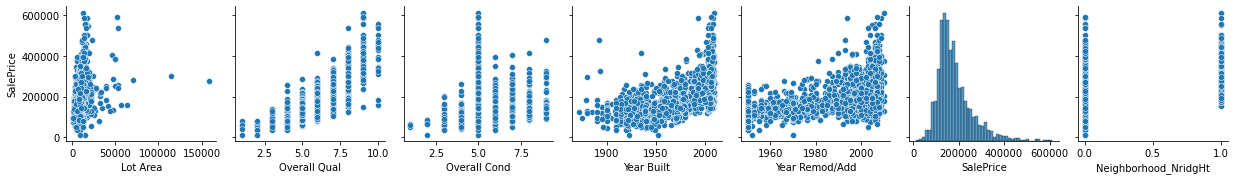

In [25]:
sns.pairplot(data=features_one_train, y_vars = ["SalePrice"], x_vars = ['Lot Area', 'Overall Qual', 'Overall Cond','Year Built', 'Year Remod/Add',
       'SalePrice', 'Neighborhood_NridgHt']);

## Second DataFrame


In [26]:
train_ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [27]:
all_numeric = train_ames._get_numeric_data()

In [28]:
all_numeric.isnull().sum()

PID                  0
MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [29]:
all_numeric[["Lot Frontage"]].mean()

Lot Frontage    69.0552
dtype: float64

In [30]:
all_numeric[["Lot Frontage"]]

,Lot Frontage
Id,
109,NaN
544,43.0
153,68.0
318,73.0
255,82.0
...,...
1587,79.0
785,NaN
916,57.0


In [31]:
median_lot_frontage = all_numeric["Lot Frontage"].median()

In [32]:
## I will replace NaN values in Lot Frontage with median value of all lot frontages which is 68.0
all_numeric["Lot Frontage"].fillna(median_lot_frontage, inplace=True)

In [33]:
median_gr_yr_blt = all_numeric["Garage Yr Blt"].median()

In [34]:
## I will replace NaN values in Lot Frontage with median value of all lot frontages which is 68.0
all_numeric["Garage Yr Blt"].fillna(median_gr_yr_blt, inplace=True)

In [35]:
all_numeric[["Garage Yr Blt"]].isnull().sum()

Garage Yr Blt    0
dtype: int64

In [36]:
## dropping these because I already looked at them and decided that I don't want to use them
all_numeric.drop(columns=["MS SubClass", "Overall Cond"], axis=1, inplace=True)

In [37]:
all_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   Lot Frontage     2051 non-null   float64
 2   Lot Area         2051 non-null   int64  
 3   Overall Qual     2051 non-null   int64  
 4   Year Built       2051 non-null   int64  
 5   Year Remod/Add   2051 non-null   int64  
 6   Mas Vnr Area     2029 non-null   float64
 7   BsmtFin SF 1     2050 non-null   float64
 8   BsmtFin SF 2     2050 non-null   float64
 9   Bsmt Unf SF      2050 non-null   float64
 10  Total Bsmt SF    2050 non-null   float64
 11  1st Flr SF       2051 non-null   int64  
 12  2nd Flr SF       2051 non-null   int64  
 13  Low Qual Fin SF  2051 non-null   int64  
 14  Gr Liv Area      2051 non-null   int64  
 15  Bsmt Full Bath   2049 non-null   float64
 16  Bsmt Half Bath   2049 non-null   float64
 17  Full Bath     

### correlation matrix for all_numeric

In [38]:
corr_all_numeric = all_numeric.corr()

In [39]:
corr_all_numeric[["SalePrice"]]

,SalePrice
PID,-0.255052
Lot Frontage,0.325129
Lot Area,0.296566
Overall Qual,0.800207
Year Built,0.571849
Year Remod/Add,0.550370
Mas Vnr Area,0.512230
BsmtFin SF 1,0.423519
BsmtFin SF 2,0.016255
Bsmt Unf SF,0.190210


### dropping columns with low corr value < 0.2

In [40]:
## also dropping these columns because they are in DF 1; where I cleaned the first 20 columns
all_numeric.drop(columns=["PID", "Lot Area", "Overall Qual", "Year Built", "Year Remod/Add"], inplace=True)

In [41]:
all_numeric.drop(columns=["BsmtFin SF 2", "Bsmt Unf SF", "Bsmt Half Bath", "Low Qual Fin SF","Bedroom AbvGr", 
                          "Kitchen AbvGr","Enclosed Porch", "3Ssn Porch","Screen Porch", "Pool Area", "Misc Val", "Mo Sold", 
                          "Yr Sold", "Kitchen AbvGr"],inplace=True)

In [42]:
all_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2051 non-null   float64
 1   Mas Vnr Area    2029 non-null   float64
 2   BsmtFin SF 1    2050 non-null   float64
 3   Total Bsmt SF   2050 non-null   float64
 4   1st Flr SF      2051 non-null   int64  
 5   2nd Flr SF      2051 non-null   int64  
 6   Gr Liv Area     2051 non-null   int64  
 7   Bsmt Full Bath  2049 non-null   float64
 8   Full Bath       2051 non-null   int64  
 9   Half Bath       2051 non-null   int64  
 10  TotRms AbvGrd   2051 non-null   int64  
 11  Fireplaces      2051 non-null   int64  
 12  Garage Yr Blt   2051 non-null   float64
 13  Garage Cars     2050 non-null   float64
 14  Garage Area     2050 non-null   float64
 15  Wood Deck SF    2051 non-null   int64  
 16  Open Porch SF   2051 non-null   int64  
 17  SalePrice       2051 non-null   i

In [43]:
all_numeric.isnull().sum()

Lot Frontage       0
Mas Vnr Area      22
BsmtFin SF 1       1
Total Bsmt SF      1
1st Flr SF         0
2nd Flr SF         0
Gr Liv Area        0
Bsmt Full Bath     2
Full Bath          0
Half Bath          0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        1
Garage Area        1
Wood Deck SF       0
Open Porch SF      0
SalePrice          0
dtype: int64

## Cleaning up the null values

In [44]:
all_numeric[["Mas Vnr Area"]]

,Mas Vnr Area
Id,
109,289.0
544,132.0
153,0.0
318,0.0
255,0.0
...,...
1587,0.0
785,0.0
916,0.0


In [45]:
## going to fill the NaN with 0.0 since that is the median value
all_numeric[["Mas Vnr Area"]].median()

Mas Vnr Area    0.0
dtype: float64

In [46]:
all_numeric["Mas Vnr Area"].fillna(0.0,inplace=True)

In [47]:
all_numeric.isnull().sum()

Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      1
Total Bsmt SF     1
1st Flr SF        0
2nd Flr SF        0
Gr Liv Area       0
Bsmt Full Bath    2
Full Bath         0
Half Bath         0
TotRms AbvGrd     0
Fireplaces        0
Garage Yr Blt     0
Garage Cars       1
Garage Area       1
Wood Deck SF      0
Open Porch SF     0
SalePrice         0
dtype: int64

In [48]:
all_numeric["BsmtFin SF 1"].fillna(0,inplace=True)

In [49]:
all_numeric.isnull().sum()

Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      0
Total Bsmt SF     1
1st Flr SF        0
2nd Flr SF        0
Gr Liv Area       0
Bsmt Full Bath    2
Full Bath         0
Half Bath         0
TotRms AbvGrd     0
Fireplaces        0
Garage Yr Blt     0
Garage Cars       1
Garage Area       1
Wood Deck SF      0
Open Porch SF     0
SalePrice         0
dtype: int64

In [50]:
## still need to clean up the following columns above
## using median value because it is resistant to outliers 

In [51]:
median_total_bsmt = all_numeric["Total Bsmt SF"].median()

In [52]:
all_numeric["Total Bsmt SF"].fillna(median_total_bsmt, inplace=True)

In [53]:
m_bfb = all_numeric["Bsmt Full Bath"].median()

In [54]:
all_numeric["Bsmt Full Bath"].fillna(m_bfb, inplace=True)

In [55]:
m_garage_cars = all_numeric["Garage Cars"].median()

In [56]:
all_numeric["Garage Cars"].fillna(m_garage_cars, inplace= True)

In [57]:
median_ga = all_numeric["Garage Area"].median()

In [58]:
all_numeric["Garage Area"].fillna(m_garage_cars, inplace= True)

### Adding some categorical data to second DF

In [59]:
## I am going to add kitchen quality to second df (using dummy vars); only cat value with high corr and 0 nulls.
all_numeric["Kitchen Qual"] = train_ames["Kitchen Qual"]

In [60]:
all_numeric = pd.get_dummies(columns=["Kitchen Qual"],drop_first=True, data=all_numeric)

## Second df complete; training data

In [61]:
all_numeric

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,...,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA
Id,,,,,,,,,,,,,,,,,,,,,
109,68.0,289.0,533.0,725.0,725,754,1479,0.0,2,1,...,0,1976.0,2.0,475.0,0,44,130500,0,1,0
544,43.0,132.0,637.0,913.0,913,1209,2122,1.0,2,1,...,1,1997.0,2.0,559.0,0,74,220000,0,1,0
153,68.0,0.0,731.0,1057.0,1057,0,1057,1.0,1,0,...,0,1953.0,1.0,246.0,0,52,109000,0,1,0
318,73.0,0.0,0.0,384.0,744,700,1444,0.0,2,1,...,0,2007.0,2.0,400.0,100,0,174000,0,0,1
255,82.0,0.0,0.0,676.0,831,614,1445,0.0,2,0,...,0,1957.0,2.0,484.0,0,59,138500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,79.0,0.0,1011.0,1884.0,1728,0,1728,1.0,2,0,...,1,2007.0,2.0,520.0,0,276,298751,0,1,0
785,68.0,0.0,262.0,861.0,861,0,861,0.0,1,0,...,0,1961.0,2.0,539.0,158,0,82500,0,0,1
916,57.0,0.0,0.0,896.0,1172,741,1913,0.0,1,1,...,1,1929.0,2.0,342.0,0,0,177000,0,0,1


# Joining my two training DF together

In [62]:
all_numeric.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,...,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA
Id,,,,,,,,,,,,,,,,,,,,,
109,68.0,289.0,533.0,725.0,725,754,1479,0.0,2,1,...,0,1976.0,2.0,475.0,0,44,130500,0,1,0
544,43.0,132.0,637.0,913.0,913,1209,2122,1.0,2,1,...,1,1997.0,2.0,559.0,0,74,220000,0,1,0
153,68.0,0.0,731.0,1057.0,1057,0,1057,1.0,1,0,...,0,1953.0,1.0,246.0,0,52,109000,0,1,0
318,73.0,0.0,0.0,384.0,744,700,1444,0.0,2,1,...,0,2007.0,2.0,400.0,100,0,174000,0,0,1
255,82.0,0.0,0.0,676.0,831,614,1445,0.0,2,0,...,0,1957.0,2.0,484.0,0,59,138500,0,0,1


In [63]:
features_one_train.head() ## I nedd to drop sale price so there are no over lapping columns in both DFs

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
109,13517,6,8,1976,2005,130500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
544,11492,7,5,1996,1997,220000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
153,7922,5,7,1953,2007,109000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,9802,5,5,2006,2007,174000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
255,14235,6,8,1900,1993,138500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
features_one_train.drop(columns = ["SalePrice"], inplace=True)

In [65]:
features_one_train.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
109,13517,6,8,1976,2005,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
544,11492,7,5,1996,1997,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
153,7922,5,7,1953,2007,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,9802,5,5,2006,2007,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
255,14235,6,8,1900,1993,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [66]:
## joining both dataframes
complete_train = all_numeric.join(features_one_train)

In [67]:
complete_train.columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'SalePrice', 'Kitchen Qual_Fa', 'Kitchen Qual_Gd',
       'Kitchen Qual_TA', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU

In [68]:
complete_train.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
109,68.0,289.0,533.0,725.0,725,754,1479,0.0,2,1,...,0,0,0,0,1,0,0,0,0,0
544,43.0,132.0,637.0,913.0,913,1209,2122,1.0,2,1,...,0,0,0,0,0,1,0,0,0,0
153,68.0,0.0,731.0,1057.0,1057,0,1057,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
318,73.0,0.0,0.0,384.0,744,700,1444,0.0,2,1,...,0,0,0,0,0,0,0,0,1,0
255,82.0,0.0,0.0,676.0,831,614,1445,0.0,2,0,...,0,0,0,0,0,1,0,0,0,0


# Cleaning the testing DF

In [69]:
testing_ames.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [70]:
testing_ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              878 non-null    int64  
 1   MS SubClass      878 non-null    int64  
 2   MS Zoning        878 non-null    object 
 3   Lot Frontage     718 non-null    float64
 4   Lot Area         878 non-null    int64  
 5   Street           878 non-null    object 
 6   Alley            58 non-null     object 
 7   Lot Shape        878 non-null    object 
 8   Land Contour     878 non-null    object 
 9   Utilities        878 non-null    object 
 10  Lot Config       878 non-null    object 
 11  Land Slope       878 non-null    object 
 12  Neighborhood     878 non-null    object 
 13  Condition 1      878 non-null    object 
 14  Condition 2      878 non-null    object 
 15  Bldg Type        878 non-null    object 
 16  House Style      878 non-null    object 
 17  Overall Qual

In [71]:
complete_train.columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'SalePrice', 'Kitchen Qual_Fa', 'Kitchen Qual_Gd',
       'Kitchen Qual_TA', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU

In [72]:
## creating a new DF with unwanted columns dropped 
## creating two seperate ones so I can join them the same way I joined the training data
## to keep the order of columns the same in both datasets


features = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF','Kitchen Qual']

test_df1 = testing_ames[features]

In [73]:
## adding the features this way to make sure testing columns align with training columns
feats = ['Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add','Neighborhood']

part2_df = testing_ames[feats]

In [74]:
## making dummy columns then combining parts with part 1 df
## making kitchen quality into dummy column 
## not dropping first so that I can match reference var to training DF

test_df1 = pd.get_dummies(columns=["Kitchen Qual"], data=test_df1)


In [75]:
## removing reference column to match columns in all_numerical DF
test_df1.drop(columns=["Kitchen Qual_Po", "Kitchen Qual_Ex"], inplace=True)

In [76]:
## making neighborhood into dummy column 
## since I used drop first with testing DF then I can use it here; will drop the same column
part2_df = pd.get_dummies(columns=["Neighborhood"], drop_first = True, data=part2_df)

In [77]:
test_df1.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA
Id,,,,,,,,,,,,,,,,,,,,
2658,69.0,0.0,0,1020,908,1020,1928,0,2,0,9,0,1910.0,1,440,0,60,1,0,0
2718,NaN,0.0,0,1967,1967,0,1967,0,2,0,10,0,1977.0,2,580,170,0,0,0,1
2414,58.0,0.0,554,654,664,832,1496,1,2,1,7,1,2006.0,2,426,100,24,0,1,0
1989,60.0,0.0,0,968,968,0,968,0,1,0,5,0,1935.0,2,480,0,0,0,0,1
625,NaN,247.0,609,1394,1394,0,1394,1,1,1,6,2,1963.0,2,514,0,76,0,0,1


In [78]:
part2_df.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
2658,9142,6,8,1910,1950,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2718,9662,5,4,1977,1977,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2414,17104,7,5,2006,2006,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989,8520,5,6,1923,2006,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
625,9500,6,5,1963,1963,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
## now I will join both DFs

test_df1 = test_df1.join(part2_df)

In [80]:
test_df1.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
2658,69.0,0.0,0,1020,908,1020,1928,0,2,0,...,0,0,1,0,0,0,0,0,0,0
2718,NaN,0.0,0,1967,1967,0,1967,0,2,0,...,0,0,0,0,1,0,0,0,0,0
2414,58.0,0.0,554,654,664,832,1496,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1989,60.0,0.0,0,968,968,0,968,0,1,0,...,0,0,1,0,0,0,0,0,0,0
625,NaN,247.0,609,1394,1394,0,1394,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [81]:
test_df1.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
2658,69.0,0.0,0,1020,908,1020,1928,0,2,0,...,0,0,1,0,0,0,0,0,0,0
2718,NaN,0.0,0,1967,1967,0,1967,0,2,0,...,0,0,0,0,1,0,0,0,0,0
2414,58.0,0.0,554,654,664,832,1496,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1989,60.0,0.0,0,968,968,0,968,0,1,0,...,0,0,1,0,0,0,0,0,0,0
625,NaN,247.0,609,1394,1394,0,1394,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [82]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lot Frontage          718 non-null    float64
 1   Mas Vnr Area          877 non-null    float64
 2   BsmtFin SF 1          878 non-null    int64  
 3   Total Bsmt SF         878 non-null    int64  
 4   1st Flr SF            878 non-null    int64  
 5   2nd Flr SF            878 non-null    int64  
 6   Gr Liv Area           878 non-null    int64  
 7   Bsmt Full Bath        878 non-null    int64  
 8   Full Bath             878 non-null    int64  
 9   Half Bath             878 non-null    int64  
 10  TotRms AbvGrd         878 non-null    int64  
 11  Fireplaces            878 non-null    int64  
 12  Garage Yr Blt         833 non-null    float64
 13  Garage Cars           878 non-null    int64  
 14  Garage Area           878 non-null    int64  
 15  Wood Deck SF       

In [83]:
complete_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lot Frontage          2051 non-null   float64
 1   Mas Vnr Area          2051 non-null   float64
 2   BsmtFin SF 1          2051 non-null   float64
 3   Total Bsmt SF         2051 non-null   float64
 4   1st Flr SF            2051 non-null   int64  
 5   2nd Flr SF            2051 non-null   int64  
 6   Gr Liv Area           2051 non-null   int64  
 7   Bsmt Full Bath        2051 non-null   float64
 8   Full Bath             2051 non-null   int64  
 9   Half Bath             2051 non-null   int64  
 10  TotRms AbvGrd         2051 non-null   int64  
 11  Fireplaces            2051 non-null   int64  
 12  Garage Yr Blt         2051 non-null   float64
 13  Garage Cars           2051 non-null   float64
 14  Garage Area           2051 non-null   float64
 15  Wood Deck SF         

In [84]:
## checking to see why my columns do not have the same value
set(complete_train) - set(test_df1)

{'Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'SalePrice'}

In [85]:
##checking original testing and training DFs to confirm above
#testing_ames["Neighborhood"].value_counts()
#train_ames["Neighborhood"].value_counts()

In [86]:
## removing GrnHill and Lankdmark columns from my training data

complete_train.drop(columns=['Neighborhood_GrnHill', 'Neighborhood_Landmrk'], inplace=True)

In [87]:
complete_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lot Frontage          2051 non-null   float64
 1   Mas Vnr Area          2051 non-null   float64
 2   BsmtFin SF 1          2051 non-null   float64
 3   Total Bsmt SF         2051 non-null   float64
 4   1st Flr SF            2051 non-null   int64  
 5   2nd Flr SF            2051 non-null   int64  
 6   Gr Liv Area           2051 non-null   int64  
 7   Bsmt Full Bath        2051 non-null   float64
 8   Full Bath             2051 non-null   int64  
 9   Half Bath             2051 non-null   int64  
 10  TotRms AbvGrd         2051 non-null   int64  
 11  Fireplaces            2051 non-null   int64  
 12  Garage Yr Blt         2051 non-null   float64
 13  Garage Cars           2051 non-null   float64
 14  Garage Area           2051 non-null   float64
 15  Wood Deck SF         

In [88]:
## checking to make sure I have the same amount of columns in both
set(complete_train) - set(test_df1)

{'SalePrice'}

## Visualizations/ Distribution

In [89]:
## creating histograms to view distributions in training dataset
#complete_train.hist(figsize = (20,20), grid = False);
#plt.tight_layout();

In [90]:
## creating histograms to view distributions in training dataset
#test_df1.hist(figsize = (20,20), grid = False);

In [91]:
complete_corr = complete_train.corr()

In [92]:
complete_corr[["SalePrice"]]

,SalePrice
Lot Frontage,0.325129
Mas Vnr Area,0.503579
BsmtFin SF 1,0.423856
Total Bsmt SF,0.628754
1st Flr SF,0.618486
2nd Flr SF,0.248452
Gr Liv Area,0.697038
Bsmt Full Bath,0.283332
Full Bath,0.537969
Half Bath,0.283001


## Feature Engineering / Interaction Terms

In [93]:
complete_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lot Frontage          2051 non-null   float64
 1   Mas Vnr Area          2051 non-null   float64
 2   BsmtFin SF 1          2051 non-null   float64
 3   Total Bsmt SF         2051 non-null   float64
 4   1st Flr SF            2051 non-null   int64  
 5   2nd Flr SF            2051 non-null   int64  
 6   Gr Liv Area           2051 non-null   int64  
 7   Bsmt Full Bath        2051 non-null   float64
 8   Full Bath             2051 non-null   int64  
 9   Half Bath             2051 non-null   int64  
 10  TotRms AbvGrd         2051 non-null   int64  
 11  Fireplaces            2051 non-null   int64  
 12  Garage Yr Blt         2051 non-null   float64
 13  Garage Cars           2051 non-null   float64
 14  Garage Area           2051 non-null   float64
 15  Wood Deck SF         

In [94]:
## using highly correlated vars (from corr matrix a few cells above) to create new interaction terms for testing
## and training data

In [95]:
complete_train["Overall_Q*Overall_C"] = complete_train["Overall Qual"] * complete_train["Overall Cond"]

In [96]:
complete_train["Bsmt_SF"] = complete_train["Gr Liv Area"] + complete_train["Total Bsmt SF"]

In [97]:
complete_train["Overall_Q**2"] = complete_train["Overall Qual"] ** 2

In [98]:
complete_train["Gr Liv Area**2"] = complete_train["Gr Liv Area"] ** 2 

In [99]:
complete_train["Garage Area**2"] = complete_train["Garage Area"] ** 2 

In [100]:
complete_train["TotRms AbvGrd**2"] = complete_train["TotRms AbvGrd"] ** 2 

In [101]:
complete_corr = complete_train.corr()

In [102]:
complete_corr[["SalePrice"]]

,SalePrice
Lot Frontage,0.325129
Mas Vnr Area,0.503579
BsmtFin SF 1,0.423856
Total Bsmt SF,0.628754
1st Flr SF,0.618486
2nd Flr SF,0.248452
Gr Liv Area,0.697038
Bsmt Full Bath,0.283332
Full Bath,0.537969
Half Bath,0.283001


In [103]:
##creating same interaction terms above but in testing data

In [104]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lot Frontage          718 non-null    float64
 1   Mas Vnr Area          877 non-null    float64
 2   BsmtFin SF 1          878 non-null    int64  
 3   Total Bsmt SF         878 non-null    int64  
 4   1st Flr SF            878 non-null    int64  
 5   2nd Flr SF            878 non-null    int64  
 6   Gr Liv Area           878 non-null    int64  
 7   Bsmt Full Bath        878 non-null    int64  
 8   Full Bath             878 non-null    int64  
 9   Half Bath             878 non-null    int64  
 10  TotRms AbvGrd         878 non-null    int64  
 11  Fireplaces            878 non-null    int64  
 12  Garage Yr Blt         833 non-null    float64
 13  Garage Cars           878 non-null    int64  
 14  Garage Area           878 non-null    int64  
 15  Wood Deck SF       

In [105]:
test_df1["Overall_Q*Overall_C"] = test_df1["Overall Qual"] * test_df1["Overall Cond"]

In [106]:
test_df1["Bsmt_SF"] = test_df1["Gr Liv Area"] + test_df1["Total Bsmt SF"]

In [107]:
test_df1["Overall_Q**2"] = test_df1["Overall Qual"] ** 2

In [108]:
test_df1["Gr Liv Area**2"] = test_df1["Gr Liv Area"] ** 2 

In [109]:
test_df1["Garage Area**2"] = test_df1["Garage Area"] ** 2 

In [110]:
test_df1["TotRms AbvGrd**2"] = test_df1["TotRms AbvGrd"] ** 2 

### cleaning test_df1 ; checking for null values

In [111]:
test_df1.isnull().sum()

Lot Frontage            160
Mas Vnr Area              1
BsmtFin SF 1              0
Total Bsmt SF             0
1st Flr SF                0
2nd Flr SF                0
Gr Liv Area               0
Bsmt Full Bath            0
Full Bath                 0
Half Bath                 0
TotRms AbvGrd             0
Fireplaces                0
Garage Yr Blt            45
Garage Cars               0
Garage Area               0
Wood Deck SF              0
Open Porch SF             0
Kitchen Qual_Fa           0
Kitchen Qual_Gd           0
Kitchen Qual_TA           0
Lot Area                  0
Overall Qual              0
Overall Cond              0
Year Built                0
Year Remod/Add            0
Neighborhood_Blueste      0
Neighborhood_BrDale       0
Neighborhood_BrkSide      0
Neighborhood_ClearCr      0
Neighborhood_CollgCr      0
Neighborhood_Crawfor      0
Neighborhood_Edwards      0
Neighborhood_Gilbert      0
Neighborhood_Greens       0
Neighborhood_IDOTRR       0
Neighborhood_MeadowV

In [112]:
test_df1["Lot Frontage"].describe()

count    718.000000
mean      69.545961
std       23.533945
min       21.000000
25%       59.000000
50%       68.000000
75%       80.000000
max      182.000000
Name: Lot Frontage, dtype: float64

In [113]:
median_lot = test_df1["Lot Frontage"].median()

In [114]:
## filling it with the median because its resistant to outliers
test_df1["Lot Frontage"].fillna(median_lot, inplace=True)

In [115]:
median_garageyr = test_df1["Garage Yr Blt"].median()

In [116]:
test_df1["Garage Yr Blt"].fillna(median_garageyr, inplace=True)

In [117]:
test_df1["Mas Vnr Area"].describe()

count     877.000000
mean      106.236032
std       187.158908
min         0.000000
25%         0.000000
50%         0.000000
75%       172.000000
max      1378.000000
Name: Mas Vnr Area, dtype: float64

In [118]:
median_vnr_area = test_df1["Mas Vnr Area"].median()

In [119]:
test_df1["Mas Vnr Area"].fillna(median_vnr_area, inplace=True)

In [120]:
test_df1.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Overall_Q*Overall_C,Bsmt_SF,Overall_Q**2,Gr Liv Area**2,Garage Area**2,TotRms AbvGrd**2
Id,,,,,,,,,,,,,,,,,,,,,
2658,69.0,0.0,0,1020,908,1020,1928,0,2,0,...,0,0,0,0,48,2948,36,3717184,193600,81
2718,68.0,0.0,0,1967,1967,0,1967,0,2,0,...,0,0,0,0,20,3934,25,3869089,336400,100
2414,58.0,0.0,554,654,664,832,1496,1,2,1,...,0,0,0,0,35,2150,49,2238016,181476,49
1989,60.0,0.0,0,968,968,0,968,0,1,0,...,0,0,0,0,30,1936,25,937024,230400,25
625,68.0,247.0,609,1394,1394,0,1394,1,1,1,...,0,0,0,0,30,2788,36,1943236,264196,36


# Modeling

#### First model

In [121]:
X = complete_train.drop(columns=["SalePrice"])
y = complete_train["SalePrice"]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=2021)

In [123]:
X_train.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Overall_Q*Overall_C,Bsmt_SF,Overall_Q**2,Gr Liv Area**2,Garage Area**2,TotRms AbvGrd**2
Id,,,,,,,,,,,,,,,,,,,,,
245,77.0,336.0,0.0,741.0,977,755,1732,0.0,2,1,...,0,0,0,0,30,2473.0,36,2999824,226576.0,49
1763,68.0,72.0,0.0,969.0,997,1288,2285,0.0,2,1,...,0,0,0,0,40,3254.0,64,5221225,419904.0,64
2809,74.0,0.0,0.0,851.0,851,886,1737,0.0,2,1,...,0,0,0,0,35,2588.0,49,3017169,334084.0,49
1835,45.0,0.0,851.0,1378.0,1378,0,1378,1.0,2,0,...,1,0,0,0,40,2756.0,64,1898884,291600.0,36
1994,85.0,0.0,0.0,662.0,1422,915,2337,0.0,2,0,...,0,0,0,0,25,2999.0,25,5461569,313600.0,100


In [124]:
X_train.shape

(1435, 56)

In [125]:
X_test.shape

(616, 56)

In [126]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [127]:
## training score from training DF
lr.score(X_train,y_train)

0.8897548831675245

In [128]:
## testing score from training DF
lr.score(X_test,y_test)

0.8472565824200579

In [129]:
## predictions for training and testing data split from training DF
train_preds = lr.predict(X_train)
test_preds  = lr.predict(X_test)

In [184]:
train_preds[:10]

array([176001.83038813, 269096.87151399, 200914.79851911, 223949.56726255,
       126864.97225525, 132892.76844368, 129773.89112371, 119219.59126723,
       276846.71392129, 270434.30201402])

In [130]:
## calculating RMSE for training and testing data split from training DF
mean_squared_error(y_train, train_preds)**0.5

25943.605245208175

In [131]:
mean_squared_error(y_test, test_preds)**0.5

31937.1957650645

In [132]:
lr = LinearRegression()
cross_val_score(lr, X,y)

array([0.87009191, 0.88819139, 0.82013843, 0.89426767, 0.83763941])

In [133]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.coef_

array([ 1.48805170e+02,  1.93795007e+01,  1.17322943e+01, -1.16013963e+01,
        4.97403055e+00,  1.65193827e+01,  4.10650312e+01,  5.33745014e+03,
       -2.15783154e+03, -3.36117066e+02,  9.09081384e+02,  6.90436464e+03,
        5.16724314e+01,  3.17860991e+03, -2.13936212e+01,  2.63616453e+00,
        3.95319497e+00, -3.92992803e+04, -3.22483084e+04, -3.51011874e+04,
        8.55510676e-01, -2.65439883e+04,  1.09840880e+04,  3.85942152e+02,
        1.08927848e+02, -2.55918096e+04, -2.68439409e+04, -9.68945168e+03,
       -9.71927903e+03, -1.04870413e+04,  7.95001376e+03, -2.09247844e+04,
       -1.19968000e+04, -1.23506629e+04, -2.06698158e+04, -3.21271978e+04,
       -1.34432517e+04, -1.35616539e+04, -1.69014716e+04, -1.98572662e+04,
        1.13594850e+04,  1.29048521e+04, -1.97100734e+04, -1.18702138e+04,
       -1.41230357e+04, -1.18844960e+04, -3.43471711e+03,  3.35730077e+04,
       -3.09867708e+03, -3.24913204e+02, -6.28387926e+02,  2.94636179e+01,
        3.39722279e+03, -

In [134]:
## making coeff DF
log_coef = pd.DataFrame({
    "column name": X.columns,
    "coef": lr.coef_
    
})

log_coef

,column name,coef
0,Lot Frontage,148.805170
1,Mas Vnr Area,19.379501
2,BsmtFin SF 1,11.732294
3,Total Bsmt SF,-11.601396
4,1st Flr SF,4.974031
5,2nd Flr SF,16.519383
6,Gr Liv Area,41.065031
7,Bsmt Full Bath,5337.450137
8,Full Bath,-2157.831537
9,Half Bath,-336.117066


In [186]:
## predictions for training and testing data split from training DF
train_preds = lr.predict(X_train)
test_preds  = lr.predict(X_test)

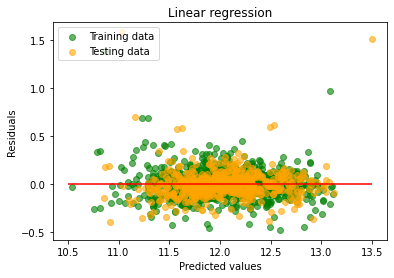

In [194]:
## plotting residuals: y- y_hat
plt.scatter(train_preds, train_preds - y_train, c = "green", marker = "o", label = "Training data", alpha=0.6)
plt.scatter(test_preds, test_preds - y_test, c = "orange", marker = "o", label = "Testing data", alpha=0.6)
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red");



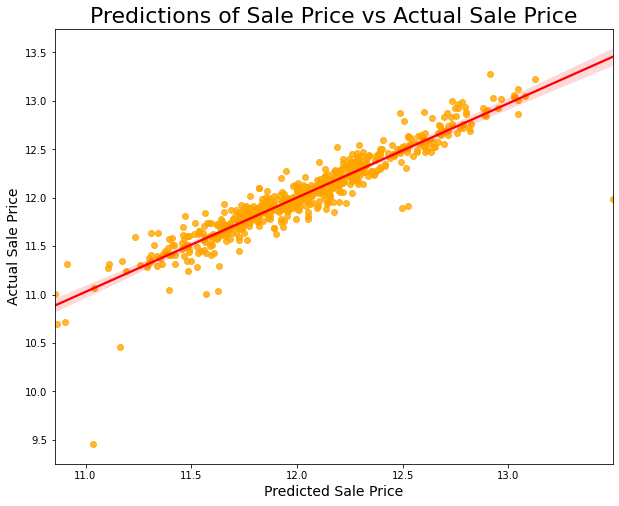

In [199]:
## plotting predicted values vs actual values

plt.figure(figsize=(10,8))
sns.regplot(data=X_train, x=test_preds, y=y_test, marker='o', color='orange', line_kws={'color':'red'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22);

### Log Transformation of SalePrice Model (log model)

In [243]:
## going to try using the log of price to see how that effects the model 
## 3.02 notes

lr_log = LinearRegression ()
X = complete_train.drop(columns=["SalePrice"])
y_log = np.log(complete_train["SalePrice"])

In [244]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.3,
                                                    random_state=2021)

lr_log.fit(X_train_log,y_train_log)

LinearRegression()

In [245]:
## training score from training DF
lr_log.score(X_train_log,y_train_log)

0.9072824157051911

In [246]:
## testing score from training DF
lr_log.score(X_test_log,y_test_log)

0.8709360535939067

In [247]:
cross_val_score(lr_log, X, y_log).mean()

0.8850538368279459

In [248]:
## predictions for log models
## remember to undo log when predicting

train_preds = np.exp(lr_log.predict(X_train_log))

In [249]:
test_preds  = np.exp(lr_log.predict(X_test_log))

In [250]:
## calculating RMSE for training and testing data split from training DF
## I think I need to unlog y_train also?
y_nolog = np.exp(y_train_log)

mean_squared_error(y_nolog, train_preds)**0.5

24278.36286033746

In [251]:
y_nolog_test = np.exp(y_test_log)
mean_squared_error(y_nolog_test, test_preds)**0.5

32757.31065795766

In [144]:
lr_log.coef_

array([ 7.65826484e-04,  2.87313303e-05,  5.64062146e-05, -1.20136936e-04,
       -2.46631789e-05,  1.27879166e-05,  3.37610115e-04,  3.05815274e-02,
       -1.49744711e-02, -7.16299703e-03,  3.41990990e-02,  3.75846728e-02,
        5.36920149e-04,  1.33351202e-02,  1.06698037e-04,  4.48620827e-05,
        8.61850194e-05, -2.06263999e-01, -1.16548739e-01, -1.34264045e-01,
        3.35529124e-06,  1.14293412e-01,  6.57659269e-02,  2.15414488e-03,
        7.72564860e-04, -1.45879156e-01, -2.09967046e-01, -6.95304696e-02,
       -2.98352548e-02, -3.80734655e-02,  6.24937940e-02, -1.10969478e-01,
       -4.22328310e-02,  1.64398253e-02, -2.15538863e-01, -2.34386481e-01,
       -3.98760905e-02, -5.23650560e-02, -1.01653894e-01, -8.86704197e-02,
        3.15966408e-02,  3.00479512e-02, -1.26393145e-01, -6.53641171e-02,
       -5.47460946e-02, -6.11360043e-02,  9.54518524e-03,  8.51182038e-02,
       -1.77816144e-02, -1.27596621e-02, -3.06462514e-03,  2.17473127e-04,
       -2.68710508e-03, -

In [145]:
## making coeff DF
log_coef = pd.DataFrame({
    "column name": X.columns,
    "coef": np.exp(lr_log.coef_)
    
})

In [146]:
log_coef

,column name,coef
0,Lot Frontage,1.000766
1,Mas Vnr Area,1.000029
2,BsmtFin SF 1,1.000056
3,Total Bsmt SF,0.999880
4,1st Flr SF,0.999975
5,2nd Flr SF,1.000013
6,Gr Liv Area,1.000338
7,Bsmt Full Bath,1.031054
8,Full Bath,0.985137
9,Half Bath,0.992863


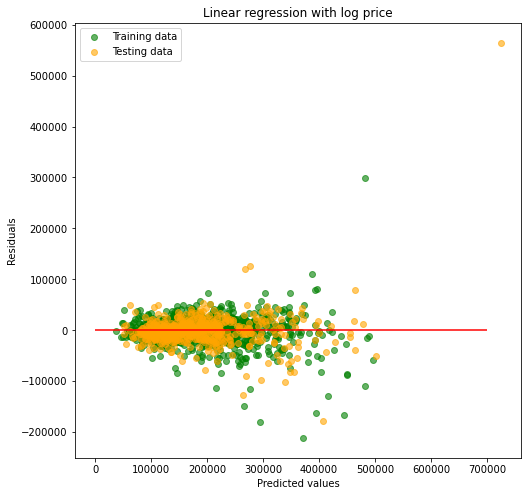

In [254]:
## plotting residuals: y- y_hat
plt.figure(figsize=(8,8))
plt.scatter(train_preds, train_preds - y_train, c = "green", marker = "o", label = "Training data", alpha=0.6)
plt.scatter(test_preds, test_preds - y_test, c = "orange", marker = "o", label = "Testing data", alpha=0.6)
plt.title("Linear regression with log price")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 700_000,color = "red");

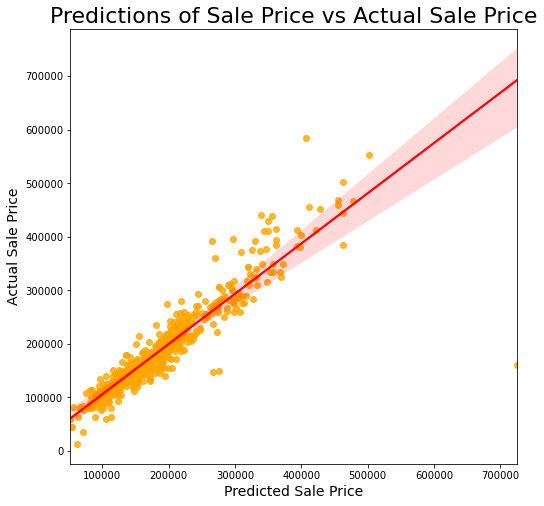

In [253]:
## plotting predicted values vs actual values

plt.figure(figsize=(8,8))
sns.regplot(data=X, x=test_preds, y=y_test, marker='o', color='orange', line_kws={'color':'red'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22);

### iteration two of log model

In [147]:
## creating a new X_df with dropped columns
## dropping terms to see if it makes a difference

X_adj = complete_train.drop(columns=["SalePrice", "Bsmt_SF","Open Porch SF", "Wood Deck SF", 
                                     "Lot Area", "Kitchen Qual_Fa","Kitchen Qual_Gd",
                                     "Kitchen Qual_TA"])
y_log = np.log(complete_train["SalePrice"])

lr2_log = LinearRegression ()

In [148]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_adj, y_log, test_size=0.3,
                                                    random_state=2021)

lr2_log.fit(X_train,y_train)

LinearRegression()

In [149]:
## training score from training DF
lr2_log.score(X_train,y_train)

0.8897548831675245

In [150]:
## testing score from training DF
lr2_log.score(X_test,y_test)

0.8472565824200579

In [151]:
cross_val_score(lr2_log, X_adj, y_log).mean()

0.8807441013877011

<u>Note:</u>
Did not preform as well as the first iteration of this model but very close to it. 

### Ridge Model

In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

from sklearn.linear_model import RidgeCV

In [201]:
## ridge model code below from lesson 4.02
## Create train/test split

X = complete_train.drop(columns=["SalePrice"])
y = complete_train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=2021)

In [202]:
## scaling the data

sc = StandardScaler()

Z_train = sc.fit_transform(X_train)
Z_test = sc.fit_transform(X_test)

In [203]:
## creat a list of alphas to check 
## trying out logspace
ridge_alpha = np.logspace(0,3,100)

## cross validate over our list of alphas
ridge_cv = RidgeCV(alphas = ridge_alpha, scoring = 'r2', cv =5)

## fit model using best ridge alpha
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([   1.        ,    1.07226722,    1.149757  ,    1.23284674,
          1.32194115,    1.41747416,    1.51991108,    1.62975083,
          1.7475284 ,    1.87381742,    2.009233  ,    2.15443469,
          2.3101297 ,    2.47707636,    2.65608778,    2.84803587,
          3.05385551,    3.27454916,    3.51119173,    3.76493581,
          4.03701726,    4.32876128,    4.64158883,    4.97702356,
          5.33669923,    5.72236766,    6.13590727,    6.57933225,
          7.05480231,    7.56463328,    8.11130831,    8...
        151.9911083 ,  162.97508346,  174.75284   ,  187.38174229,
        200.92330026,  215.443469  ,  231.01297001,  247.7076356 ,
        265.60877829,  284.80358684,  305.38555088,  327.45491629,
        351.11917342,  376.49358068,  403.70172586,  432.87612811,
        464.15888336,  497.70235643,  533.66992312,  572.23676594,
        613.59072734,  657.93322466,  705.48023107,  756.46332755,
        811.13083079,  869.74900262,  932.60334688, 10

In [204]:
## checking for the optimal alpha value
ridge_cv.alpha_

284.8035868435802

In [205]:
##checking r2 scores for training
ridge_cv.score(Z_train, y_train)

0.8731885146253101

In [206]:
##checking r2 scores for testing
ridge_cv.score(Z_test, y_test)

0.8135286607699068

In [207]:
ridge_cv.best_score_

0.8464674245395558

In [210]:
z_preds_test = ridge_cv.predict(Z_test)

In [211]:
z_preds_train = ridge_cv.predict(Z_train)

In [224]:
mean_squared_error(y_train, z_preds_train)**0.5

27824.664810194663

In [225]:
mean_squared_error(y_test, z_preds_test)**0.5

35287.5554481876

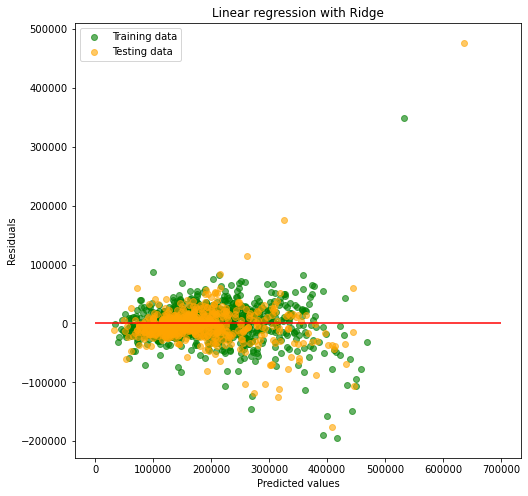

In [242]:
## plotting residuals: y- y_hat
plt.figure(figsize=(8,8))
plt.scatter(z_preds_train, z_preds_train - y_train, c = "green", marker = "o", label = "Training data", alpha=0.6)
plt.scatter(z_preds_test, z_preds_test - y_test, c = "orange", marker = "o", label = "Testing data", alpha=0.6)
plt.title("Linear regression with Ridge")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 700_000,color = "red");

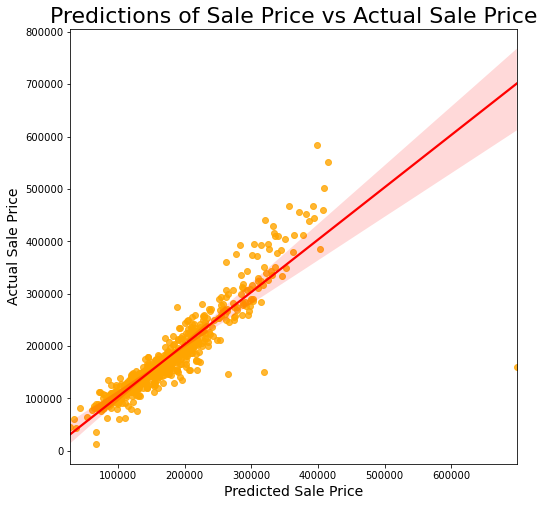

In [218]:
## plotting predicted values vs actual values

plt.figure(figsize=(8,8))
sns.regplot(data=X, x=z_preds_test, y=y_test, marker='o', color='orange', line_kws={'color':'red'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22);

### LASSO Model

In [226]:
from sklearn.linear_model import LassoCV

In [227]:
## from notes 4.02 lesson
##setting up alphas

lasso_alphas = np.logspace(-3,0,100)
lasso_cv = LassoCV(alphas= lasso_alphas, cv =5, max_iter = 10_000_000, tol = 0.000000000001)

## fitting the model
lasso_cv.fit(Z_train,y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5, max_iter=10000000, tol=1e-12)

In [228]:
lasso_cv.alpha_

1.0

In [229]:
lasso_cv.score(Z_train, y_train)


0.8897546030719236

In [230]:
lasso_cv.score(Z_test, y_test)

0.843175750488797

In [235]:
z_preds_test = lasso_cv.predict(Z_test)

In [236]:
z_preds_train = lasso_cv.predict(Z_train)

In [237]:
mean_squared_error(y_train, z_preds_train)**0.5

25943.638202155817

In [238]:
mean_squared_error(y_test, z_preds_test)**0.5

32361.015208330773

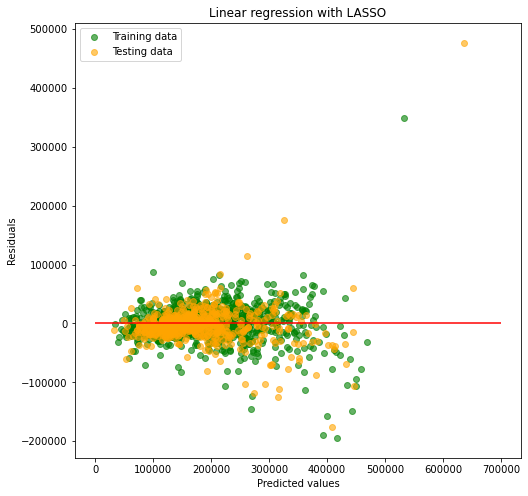

In [241]:
## plotting residuals: y- y_hat
plt.figure(figsize=(8,8))
plt.scatter(z_preds_train, z_preds_train - y_train, c = "green", marker = "o", label = "Training data", alpha=0.6)
plt.scatter(z_preds_test, z_preds_test - y_test, c = "orange", marker = "o", label = "Testing data", alpha=0.6)
plt.title("Linear regression with LASSO")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 700_000,color = "red");

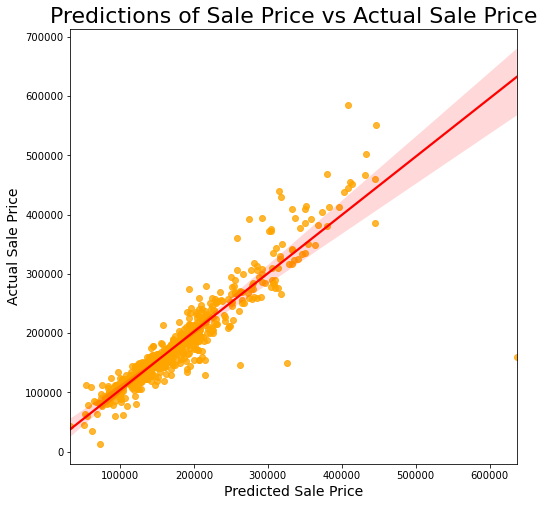

In [240]:
## plotting predicted values vs actual values

plt.figure(figsize=(8,8))
sns.regplot(data=X, x=z_preds_test, y=y_test, marker='o', color='orange', line_kws={'color':'red'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22);

### Elastic Net (didn't work for me)

In [165]:
## all code taken from bonus notes 4.02
#from sklearn.linear_model import ElasticNetCV

In [166]:
#X = complete_train.drop(columns=["SalePrice"])
#y = complete_train["SalePrice"]


In [167]:
# Set up a list of alphas to check.
#enet_alphas = np.logspace(0, 3, 50)

# Set up our l1 ratio. 
## parameter corresponds to lasso (L1 penalty)
## maybe I can set a list of ratios to try?
#enet_ratio = 0.3

# Instantiate model.
#enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5,  max_iter = 10_000_000, tol = 0.0015)

# Fit model using optimal alpha.
#enet_model = enet_model.fit(X_train, y_train)

**Thoughts**: could not get this to converage. Not sure why or what is taking so long?

### Baseline model

In [168]:
X = complete_train.drop(columns=["SalePrice"])
y = complete_train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=2021)

In [169]:
## baseline predictions
baseline_train_preds = [y_train.mean()]*len(y_train)
baseline_test_preds  = [y_train.mean()]*len(y_test)

In [170]:
# Calculate baseline RMSE for both our test and train data

y_train_baseline = [y_train.mean()] *len(y_train)
print(f'Baseline RMSE - Train: {mean_squared_error(y_train, y_train_baseline)**0.5}')

Baseline RMSE - Train: 78135.904970884


In [171]:
y_test_baseline = [y_train.mean()]*len(y_test)
print(f'Baseline RMSE - Test: {mean_squared_error(y_test, y_test_baseline)**0.5}')

Baseline RMSE - Test: 81766.89316194685


#### Observations & Interpretations:
<u>**First model**</u>: The r2 scores for my training data are, what I think to be, good scores! They are not in the 90s range but this is one of the best models I've built so far! My model has high varience because it preforms worse (has lower score values) on the testing data than the training data. This means my model is overfit and it can benefit from lasso or ridge regression (using scaled data so all vars get penalized equally) to help reduce the varience. Another key indication that this model has high varience is that the cross_val_scores are not close together. The RMSE is lower for my training model than my testing model. On average my testing predictions are off by 25,943 dollars while my testing data is on average off by 31,937 dollars.

Interpretation of R2 from first model using the mean of cross_val score: 86% of the varience in sale price can be explained by the features in our model relative to a model with no predictors.

Interpretation for some coeffs: For every one foot increase in lot frontage, we expect sale price to increase by 148 dollars, all else being held constant. For every one square foot increase in garage living area, we expect sale price to increase by 41 dollars, all else being held constant. For every one square foot increase in total basement area, we expect sale price to decrease by 11 dollars, all else being held constant


<u>**Log model**</u>: Before I use lasso regression I will log transform SalePrice to see if/how it will improve my model. Logrithmically transforming a variable will transform the distribution towards a normal distribution and should improve linearity between the saleprice and dependent variables. Indeed, after using the log of my model, I can see the training score (from my testing DF) increased to 0.90 while my testing score increased to 0.87. I also think the varience improved, my cross_val_scores are grouped more closely together. The RMSE values for my log model training and testing data are about the same distance as my original model. On average my testing predictions are off by 24,278 dollars while my testing data is on average off by 32,757 dollars.

Interpretation of R2 from log model using the mean of cross_val score: 88% of the varience in sale price can be explained by the features in our model relative to a model with no predictors.

Interpretation for some coeffs: Interpretation for some coeffs: For every one foot increase in lot frontage, we expect to see a 1 dollar increase in sale price, all else being held constant. For every one unit increase in overall quality, we expect to see a 1.121 dollar increase in sale price, all else being held constant. 


<u>**Ridge model**</u>: The r2 scores are better than my first model but not better than my log model scores. It seems the varience increased? There is a larger gap between my training and testing scores. I think my model is still overfit. 

<u>**LASSO model**</u>: The r2 scores for my training and testing sets are better than the ridge model which makes sense? Lasso punishes certain features by zeroing out that category and because my model has high varience (too complex and has too many features) the best thing to do would be to get rid of features and that's essentially what LASSO is doing. It might make sense for me to drop some features and re run the log model to increase r2 score.

<u>**Baseline model**</u>: All of the models above preform better than the baseline which is good! The baseline model is based on the avergae of the dependent variable, sale price. It is a naive model that always predicts the mean of sale price.

I would have to say that the log model did the best. I tried to update the log model by dropping some numeric features but it did not help as much as I thought it would. I think it's possible the categorical data that is making the model too complex? Ultimately I will use the log model (iteration one) for making predictions on the testing csv data.

### Using Log Model to Make Predictions on Test Dataset

In [172]:
## making a kaggle model using features in log model iteration one
X = complete_train.drop(columns=["SalePrice"])
y = np.log(complete_train["SalePrice"])

## train/test split 
## instantiate and fitting again
## just to make sure nothing weird happened to my model because of the code above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=2021)

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [174]:
## make kaggle dataset
#X_k = test_df1.drop(columns='SalePrice')

In [ ]:
X_k.head()

In [ ]:
## creating saleprice column in new dataset
## using same model as above to predict on test set
X_k["SalePrice"] = lr.predict(X_k)

In [ ]:
## taking the exp of Sale Price because its logged
X_k["SalePrice"] = np.exp(X_k["SalePrice"])

In [ ]:
X_k.head()

In [ ]:
## set output to be a DF with only saleprice column

output = X_k[["SalePrice"]]
output.head()

In [ ]:
## save output to CSV

output.to_csv("./datasets/first_submission.csv")

In [ ]:
output_check = pd.read_csv("./datasets/first_submission.csv")
output_check.head()